Danny Abraham
<center><h1>CMPS 351</h1></center>
<center><h2>Assignment 6</h2></center>

In [1]:
import numpy as np
from numpy import linalg as la
from scipy.optimize import linprog as lp
import cvxpy as cvx
import matplotlib.pyplot as plt

## Center of Polyhedron
---

In [2]:
x = cvx.Variable(2)
r = cvx.Variable()

A = np.array( [[0., -1.], [2., -1.], [1., 1.], [-1/3, 1.], [-1., 0.], [-1., -1.]] )
b = np.array( [0., 8., 7., 3., 0., -1.] )

for i in range(len(b)):
    b[i] = b[i]/la.norm(A[i])
    A[i] = A[i]/la.norm(A[i])

In [24]:
def radius(x):
    r = (A@x - b)
    return cvx.min(r)

In [25]:
def radius_obj(x):
    return cvx.min(r + A@x -b)

In [26]:
obj = cvx.Maximize(radius(x))

In [27]:
def constraints_(x):
    c = []
    a = A@x
    for i,a_ in enumerate(a):
        c.append(a_ + (A[i][0]**2 + A[i][1]**2)**0.5*r <= b[i])
    return c

In [28]:
constraints = constraints_(x)
prob = cvx.Problem(cvx.Maximize(r), constraints)
prob.solve()

1.86556478457617

In [29]:
prob.solution

Solution(optimal, {1: array(1.86556478), 0: array([2.4961282 , 1.86556478])}, {64: 0.46639119614404256, 66: 0.0, 68: 0.16489418873957898, 70: 0.3687146151163785, 72: 0.0, 74: 0.0}, {'solve_time': 4.408892651143951e-05, 'num_iters': 100})

In [30]:
x.value

array([2.4961282 , 1.86556478])

ValueError: min() arg is an empty sequence

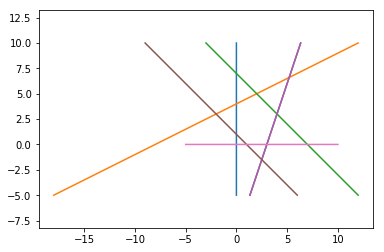

In [31]:

a = np.linspace(-5,10,10000)

fig, ax = plt.subplots()
for i in range(len(b)):
    if A[i][1] != 0:
        y = -(A[i][0]*a -b[i])/(A[i][1])
    ax.plot(y, a)
ax.plot(a, a*0)
ax.axis('equal')
circle=plt.Circle((x.value[1],x.value[0]), min(radius(x.value)), color='r')
ax.add_artist(circle)
ax.set_xlim([-2,5])
ax.set_ylim([-2,5])

In [32]:
for c in constraints:
    print(c.dual_value)

0.46639119614404256
0.0
0.16489418873957898
0.3687146151163785
0.0
0.0


In [12]:
r.value

array(1.86556478)

#### Significance of Lagrangian Multipliers
The lagrange multipiers here represent the sensitivity of the objective function to a change in the corresponding constraint. Here we have 3 non zero lagrange multipliers. These represent the lines that the circle is touching. If we chang eany of these 3 constraints, the circle's radius will also change proportionally.

Thee are also 3 zero-values lagrange multipliers. These represent the lines the circle is not touching. If these constraints are modified slightly they will not affect the circle's radius at all.

#### Lagrangian
<img src='lagrangian.png'>

The first order optimality conditions can be expressed as 
<img src='optimality.png'>

These are satisfied given the values obtained by the cvxpy optimization

## Minimum Cost Flow
---
#### Cost Function

In [14]:
def cost(p, x):
    return np.multiply(p,x).sum()

In [15]:
p = np.array([[1,2],[3,4]])
x = np.array([[2,2],[3,2]])

print(cost(p, x))

23


In [16]:
p = [2, 5, 3, 7, 1]
x0_bounds = [0, 5]
x1_bounds = [0, 2]
x2_bounds = [0, 1]
x3_bounds = [0, 2]
x4_bounds = [0, 4]


In [17]:
c = [2, 5, 3, 7, 1]
A =  [[1, 0, -1, -1, 0], 
      [0, 1, 1, 0, -1], 
      [1, 1, 0, 0, 0]]
b = [0, 0, 4]
res = lp(c, A_eq=A, b_eq=b,
         bounds=(x0_bounds, x1_bounds, x2_bounds, x3_bounds, x4_bounds),
         options = { "disp" : True } )

Optimization terminated successfully.
         Current function value: 27.000000   
         Iterations: 8


In [18]:
print(res)

     con: array([0., 0., 0.])
     fun: 27.0
 message: 'Optimization terminated successfully.'
     nit: 8
   slack: array([], dtype=float64)
  status: 0
 success: True
       x: array([2., 2., 1., 1., 3.])


The capacity constraints describe the sensitivity towards changing the capacity of an edge. Meaning a high multiplier means a slight change to this constraint greatly affects the optimality. 

The node constraints describe the sensitivity to changing the nodes. The only way to change the node constrainst without changing the the capacity constraints is to change the network. A large lagrange multiplier here would indicate that the corresponding node is a bottleneck to the flow. 

## Image Reconstruction
---

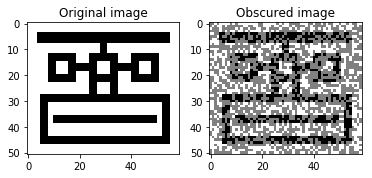

In [19]:
# This template generates synthetic data (missing pixels) to use
# in testing the solution of Problem 3 in Assignment 6.
# Unknown pixels are defined by the array called "unknown".
# Obscured image is in the array U1.

#import numpy as np
#import matplotlib
#matplotlib.use("TkAgg")     # for macOS

# Read a sample image
U0 = plt.imread('bwicon.png')
m, n = U0.shape

# Create 50% mask of known pixels and use it to obscure the original
np.random.seed(7592)                 # seed the randonm number generator (for repeatability)
unknown = np.random.rand(m,n) < 0.5
U1 = U0*(1-unknown) + 0.5 *unknown


# Display images
plt.figure(1)
plt.subplot(1, 2, 1)
plt.imshow(U0, cmap='gray')
plt.title('Original image')
plt.subplot(1, 2, 2)
plt.imshow(U1, cmap='gray')
plt.title('Obscured image')
plt.show()

In [20]:
unknown.sum()

1527

In [21]:
U1

array([[0.5, 0.5, 1. , ..., 0.5, 1. , 1. ],
       [0.5, 1. , 0.5, ..., 0.5, 1. , 0.5],
       [1. , 0.5, 0.5, ..., 0.5, 0.5, 0.5],
       ...,
       [1. , 1. , 1. , ..., 1. , 1. , 1. ],
       [0.5, 1. , 0.5, ..., 1. , 1. , 0.5],
       [0.5, 1. , 0.5, ..., 0.5, 0.5, 1. ]])

In [22]:
u = cvx.Variable(U1.shape)

In [23]:
def cost(u):
    s = 0
    for i in range(1, U1.shape[0]):
        for j in range(1, U1.shape[1]):
            s += (u[i][j] - u[i - 1][j])**2 + (u[i][j] - u[i][j - 1])**2
    return s

In [24]:
u[0][1]

Expression(AFFINE, UNKNOWN, ())

In [25]:
obj = cvx.Minimize(cost(u))

In [26]:
def constraints_(u):
    c = []
    for i in range(1, U1.shape[0]):
        for j in range(1, U1.shape[1]):
            if not(unknown[i][j]):
                c.append(u[i][j] == U1[i][j])
    return c

In [27]:
constraints = constraints_(u)

In [28]:
prob = cvx.Problem(obj,constraints)
prob.solve()

C:\Users\daa50\AppData\Local\conda\conda\envs\opt\lib\site-packages\cvxpy\problems\problem.py:781: RuntimeWarning: overflow encountered in long_scalars
  if self.max_big_small_squared < big*small**2:
C:\Users\daa50\AppData\Local\conda\conda\envs\opt\lib\site-packages\cvxpy\problems\problem.py:782: RuntimeWarning: overflow encountered in long_scalars
  self.max_big_small_squared = big*small**2


431.5104509900433

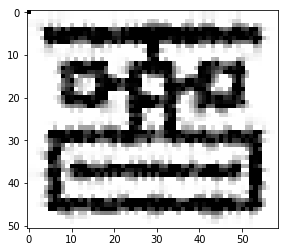

In [29]:
plt.imshow(u.value, cmap='gray')